# Project: Insurance Policy Cancellation (DS)
---------------------------------------------

**Group 1:**

Daniel Jackson<br>
Chanju Oh<br>
Michael Osei

**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**

*This dataset comes from the 2022 NESS Statathon (Theme 1) from 2022. An archived version of the website and related data has been posted on HuskyCT.*

**Challenge:** Using historical policy data, create a multiclass predictive model to predict the policies that are most likely to be canceled and those most likely to be renewed, as well as understand what variables are most influential in causing a policy cancellation.

For this theme, there are true answers, and a team should focus on proposing the best predictive model. The performance of a team will be mainly based on the predictive performance of the propose method measured by accuracy and the quality of the code. You can use Python's weighted F1 score to calculate the performance of for your model on the test partition.
  * Make sure you use the 'weighted' F1 score
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
The Kangaroo data set is based on 4 years of property insurance policies from 2013 to 2017. There are roughly 1 million policies in the training data and each policy only has one observation. There were almost 230,000 policies canceled during the effective term. Your work is to build a model on the training data and use your best model to predict the cancelation indicator for each policy in test data.

Variable descriptions
* id - Policy id (cannot be used in model)
* tenure - Number of years with Kangaroo
* claim.ind - Occurrence of claim (0=no, 1=yes)
* n.adults - Number of adults in the property
* n.children - Number of children in the property
* ni.gender - Gender of policyholder
* ni.marital.status - Marital status of policyholder (0=no, 1=yes)
* premium - Price of the policy
* sales.channel - Medium through which policy was purchased
* coverage.type - Type of coverage
* dwelling.type - Type of dwelling
* len.at.res - Length at residence (how long policyholder lived at property)
* credit - Financial credit level of policyholder
* house.color - Color of house
* ni.age - Age of policholder
* year - Year of the policy
* zip.code - Zip code of the property
* cancel - cancelation indicator (0=not cancel, 1=may cancel but can be convinced, 2=cancel). **This is the response variable.** Dave is deleting the rows where `cancel==-1`!

The train and test files have also been made available to students for modeling on HuskyCT.

In [ ]:
# https://drive.google.com/file/d/1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr/view?usp=share_link
# https://drive.google.com/file/d/1k8asF0dptYNn1DFkylSEpr0D9FstpIO4/view?usp=share_link
# https://drive.google.com/file/d/1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k/view?usp=share_link
# https://drive.google.com/file/d/1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG/view?usp=share_link

!gdown 1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
!gdown 1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
!gdown 1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k
!gdown 1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG

Downloading...
From: https://drive.google.com/uc?id=1cF4YgsHb6jWoM8s1oMckCE5DXz71dJIr
To: /content/X_test.csv
100% 31.5M/31.5M [00:00<00:00, 201MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k8asF0dptYNn1DFkylSEpr0D9FstpIO4
To: /content/X_train.csv
100% 63.9M/63.9M [00:00<00:00, 166MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KdOq5IQiwvpTy1XpAp9CLn7zXgFGNq9k
To: /content/y_test.csv
100% 690k/690k [00:00<00:00, 161MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VirvGGFaqg1ifPjgO0MzHg3Bc7KuwotG
To: /content/y_train.csv
100% 1.40M/1.40M [00:00<00:00, 179MB/s]


# Importing Commonly Used Libraries







In [ ]:
# importing typically used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing libraries for logistic regression models
from sklearn.linear_model import LogisticRegression # logistic
from scipy.stats import uniform

# importing libraries for decision tree models
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

# importing libraries for random forest models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

# for tuning random forest models
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# importing libraries for classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics

# permutation testing
from sklearn.inspection import permutation_importance

# sampling
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# these functions are useful for scaling
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler



# EDA, Data Cleaning and Feature Engineering

The following steps were followed during EDA:
1.  Import libraries
2.  Load the datasets
3.  Drop "Policy ID" column
4.  Analyze and correct column data types
5.  Drop the missing values in the Train partition
6.  Impute the missing values in the Test partition
7.  Create dummy variables for categorical variables
8.  Separate into X_train, X_test, y_train and y_test
9.  Apply the Standard Scaler
10. Resample with SMOTE



## Loading the Datasets

In [ ]:
# assign dataset to each partition
X_train_df = pd.read_csv('/content/X_train.csv')
X_test_df = pd.read_csv('/content/X_test.csv')
y_train_df = pd.read_csv('/content/y_train.csv')
y_test_df = pd.read_csv('/content/y_test.csv')

# checking work
print(X_train_df.shape)
print(X_test_df.shape)
print(y_train_df.shape)
print(y_test_df.shape)

(700232, 17)
(344891, 17)
(700232, 1)
(344891, 1)


Combining X_train & Y_train as Train and X_test & y_test as Test to make it easier for EDA

In [ ]:
# concatenate X and y partitions placing the response variable in the first column.
Train = pd.concat([y_train_df , X_train_df], axis=1)
Test = pd.concat([y_test_df , X_test_df], axis=1)

# checking work
print(Train.shape)
print(Test.shape)


(700232, 18)
(344891, 18)


In [ ]:
# this is a temporary dataset to make it easier to visualize the data.
temp = pd.concat([Train, Test], axis=0)

# checking work
print(temp.shape)
temp.head()

(1045123, 18)


,cancel,id,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,942391,2013,15056.0,yellow,55.0,15.0,high,A,House,935.554116,Phone,F,1.0,1.0,1.0,14.0,0.0
1,0,2792,2014,80014.0,red,60.0,17.0,medium,A,House,835.804218,Phone,F,1.0,1.0,1.0,17.0,0.0
2,0,282556,2014,85002.0,white,48.0,15.0,high,A,Condo,958.488416,Broker,M,1.0,1.0,0.0,11.0,1.0
3,0,738330,2014,85051.0,red,57.0,15.0,high,A,House,963.496010,Phone,F,1.0,2.0,1.0,19.0,0.0
4,0,243724,2013,85077.0,white,42.0,16.0,high,B,House,803.088375,Broker,F,1.0,2.0,2.0,12.0,0.0


Checking the distribution of each column

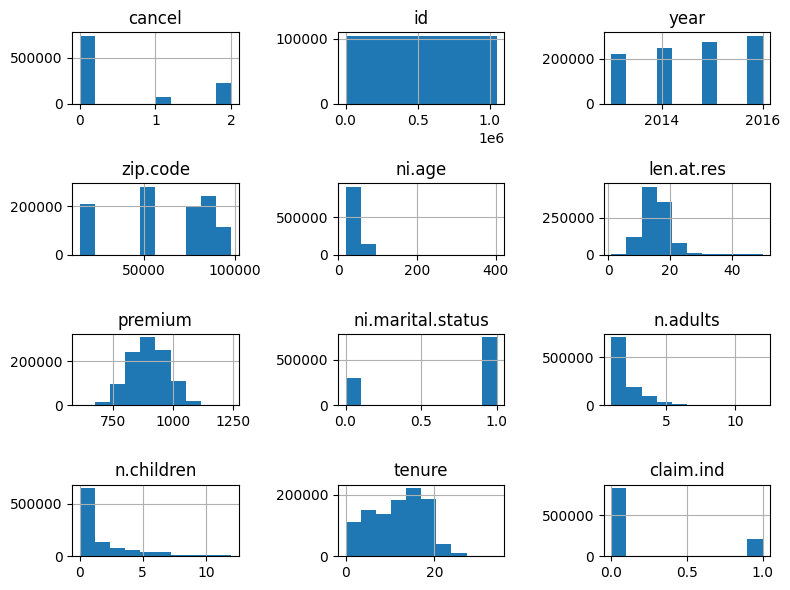

In [ ]:
temp.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

##  Dropping "Policy ID" Column

In [ ]:
# dropping id column from train and test
Train = Train.drop('id', axis=1)
Test = Test.drop('id', axis=1)


# checking work
print(Train.shape , '\n')
print(Test.shape , '\n')
print(Train.head(3).to_string())
Test.head(3)

(700232, 17) 

(344891, 17) 

   cancel  year  zip.code house.color  ni.age  len.at.res  credit coverage.type dwelling.type     premium sales.channel ni.gender  ni.marital.status  n.adults  n.children  tenure  claim.ind
0       0  2013   15056.0      yellow    55.0        15.0    high             A         House  935.554116         Phone         F                1.0       1.0         1.0    14.0        0.0
1       0  2014   80014.0         red    60.0        17.0  medium             A         House  835.804218         Phone         F                1.0       1.0         1.0    17.0        0.0
2       0  2014   85002.0       white    48.0        15.0    high             A         Condo  958.488416        Broker         M                1.0       1.0         0.0    11.0        1.0


,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0
1,0,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0
2,0,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0


## Column Datatypes

### Analyzing Column Datatypes

In [ ]:
# checking data types
print(Train.dtypes , '\n')
print(Test.dtypes)

cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float64
dtype: object 

cancel                 int64
year                   int64
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status    float64
n.adults             float64
n.children           float64
tenure               float64
claim.ind            float6

### Correcting Column Datatypes

Year, marital status, number of adults, number of children and occurrence of a claim should be objects as they are categorical in this dataset.

In [ ]:
# changing dtypes for Train
Train = Train.astype({'year': object ,  'ni.marital.status' : object , 'n.adults' : object , 'n.children' : object , 'claim.ind' : object ,})

# checking my work
Train.dtypes

cancel                 int64
year                  object
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status     object
n.adults              object
n.children            object
tenure               float64
claim.ind             object
dtype: object

In [ ]:
# changing dtypes for Test
Test = Test.astype({'year': object , 'ni.marital.status' : object , 'n.adults' : object , 'n.children' : object , 'claim.ind' : object ,})

# checking my work
Test.dtypes

cancel                 int64
year                  object
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status     object
n.adults              object
n.children            object
tenure               float64
claim.ind             object
dtype: object

## Missing Values

### Dropping Missing Values in Train Partition

In [ ]:
# checking total # rows in Train
Train.shape

(700232, 17)

In [ ]:
# checking for nulls in Train
Train.isna().sum()

cancel                 0
year                   0
zip.code             631
house.color          620
ni.age               708
len.at.res           665
credit               616
coverage.type        663
dwelling.type        651
premium              624
sales.channel        696
ni.gender            643
ni.marital.status    647
n.adults             606
n.children           616
tenure               655
claim.ind            658
dtype: int64

In [ ]:
# checking total amount of rows with missing values
mask = Train.isna()
null_counts = mask.sum(axis=1)
num_null_rows = (null_counts > 0).sum()
print("Total number of rows with missing values:", num_null_rows)

Total number of rows with missing values: 9623


In [ ]:
# % of rows in Train with nulls

9623/700232

0.013742588170777685

Less than 1.5% of the rows in Train contain nulls so I will drop them since I don't expect so few rows to make much of an impact on the model's performance.

In [ ]:
# dropping nulls in Train
Train = Train.dropna()

# checking
print(Train.shape , '\n')
# let's check which columns has missing values
Train.isna().sum()

(690609, 17) 



cancel               0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
dtype: int64

### Imputing Missing Values in Test Partition

In [ ]:
# checking total # rows in Test
Test.shape

(344891, 17)

In [ ]:
# checking for nulls in Test
Test.isna().sum()

cancel                 0
year                   0
zip.code             313
house.color          319
ni.age               293
len.at.res           295
credit               289
coverage.type        316
dwelling.type        339
premium              331
sales.channel        324
ni.gender            314
ni.marital.status    345
n.adults             323
n.children           319
tenure               323
claim.ind            324
dtype: int64

We can't drop rows with the missing values in the Test dataset because we want the model to predict on all rows.  Therefore we will impute missing values in the Test dataset.

Given the small amount of missing values we will utilize the mean or mode imputation method depending upon whether the value is categorical or numerical.

#### Mode Imputation for Categorical Columns

In [ ]:
# seeing which columns are categorical and have nulls
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344891 entries, 0 to 344890
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cancel             344891 non-null  int64  
 1   year               344891 non-null  object 
 2   zip.code           344578 non-null  float64
 3   house.color        344572 non-null  object 
 4   ni.age             344598 non-null  float64
 5   len.at.res         344596 non-null  float64
 6   credit             344602 non-null  object 
 7   coverage.type      344575 non-null  object 
 8   dwelling.type      344552 non-null  object 
 9   premium            344560 non-null  float64
 10  sales.channel      344567 non-null  object 
 11  ni.gender          344577 non-null  object 
 12  ni.marital.status  344546 non-null  object 
 13  n.adults           344568 non-null  object 
 14  n.children         344572 non-null  object 
 15  tenure             344568 non-null  float64
 16  cl

In [ ]:
# specify categorical columns for mode imputation
columns_to_impute = ['zip.code', 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
                    'ni.gender', 'ni.marital.status', 'n.adults' , 'n.children' , 'claim.ind']

# get mode for each column
mode_values = Test[columns_to_impute].mode().iloc[0]

# perform mode imputation for each column
Test[columns_to_impute] = Test[columns_to_impute].fillna(mode_values)

# checking work
print(Test.shape , '\n')
print(Test.isna().sum())
Test.head()

(344891, 17) 

cancel                 0
year                   0
zip.code               0
house.color            0
ni.age               293
len.at.res           295
credit                 0
coverage.type          0
dwelling.type          0
premium              331
sales.channel          0
ni.gender              0
ni.marital.status      0
n.adults               0
n.children             0
tenure               323
claim.ind              0
dtype: int64


,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0
1,0,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0
2,0,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0
3,0,2015,98026.0,blue,45.0,15.0,high,A,Tenant,949.368847,Broker,M,1.0,1.0,3.0,12.0,0.0
4,2,2014,50022.0,white,28.0,19.0,low,C,Tenant,875.873613,Broker,F,1.0,1.0,1.0,7.0,1.0


#### Mean Imputation for Numerical Columns

##### Table 1 - Outlier Table for Numerical Predictors

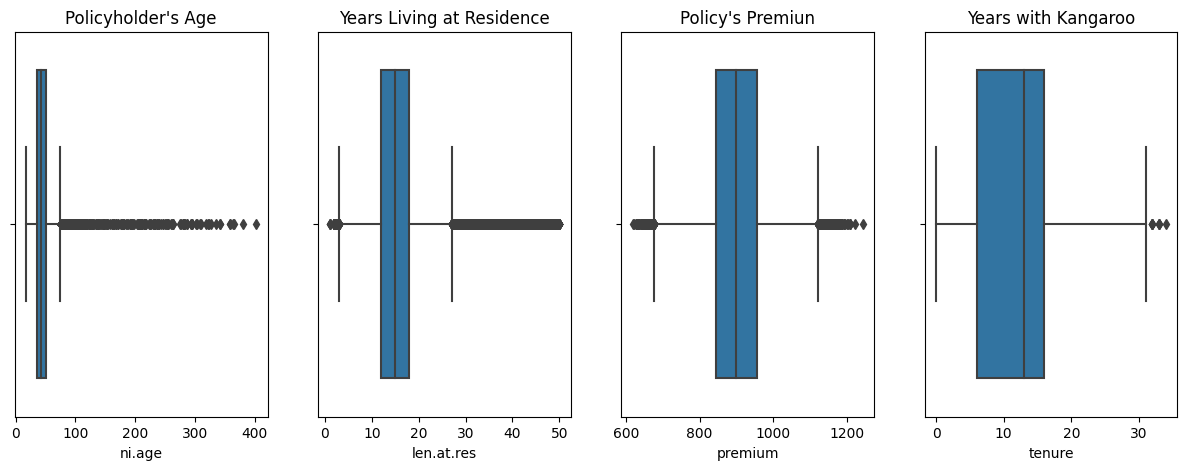

In [ ]:
# creating a row of plots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

# plotting each predictors's boxplot on a separate subplot
sns.boxplot(x=Test['ni.age'], ax=axs[0])
sns.boxplot(x=Test['len.at.res'], ax=axs[1])
sns.boxplot(x=Test['premium'], ax=axs[2])
sns.boxplot(x=Test['tenure'], ax=axs[3])

# set the title for each subplot
axs[0].set_title("Policyholder's Age")
axs[1].set_title('Years Living at Residence')
axs[2].set_title("Policy's Premiun")
axs[3].set_title('Years with Kangaroo')

# display the plot
plt.show()

Using a density plot and the mean to ensure that mean imputation makes sense for the remaining 4 numerical columns with nulls.

##### Plot 1 - Distribution of Policy Holder's Age

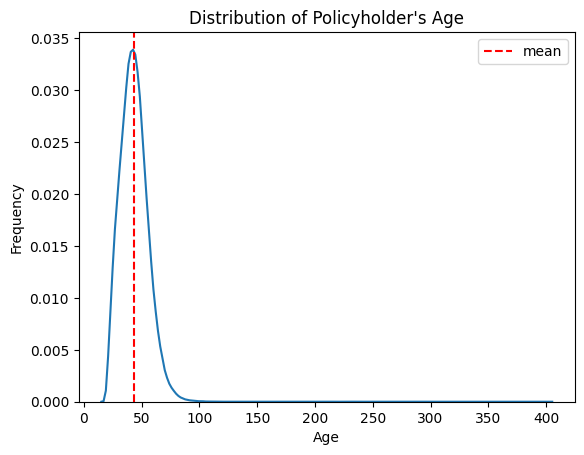

In [ ]:
# density plot
sns.kdeplot(Test['ni.age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Policyholder's Age")

# plot a vertical line for the mean
mean_val = Test['ni.age'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', label='mean')

plt.legend() # added a legend to define the dotted line
plt.show()

##### Plot 2 - Number of Years Policyholder Lived at Residence

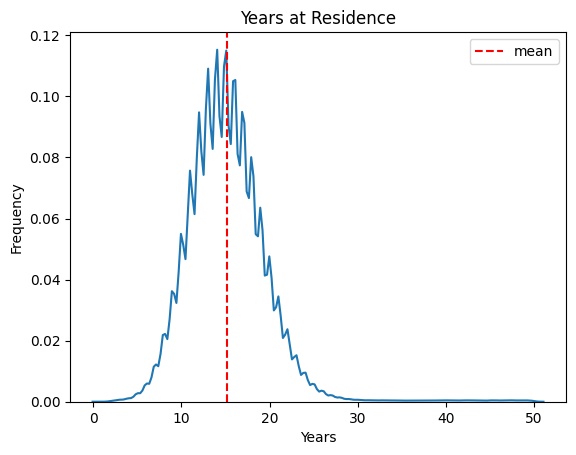

In [ ]:
# density plot
sns.kdeplot(Test['len.at.res'])
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title("Years at Residence")

# plot a vertical line for the mean
mean_val = Test['len.at.res'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', label='mean')

plt.legend() # added a legend to define the dotted line
plt.show()

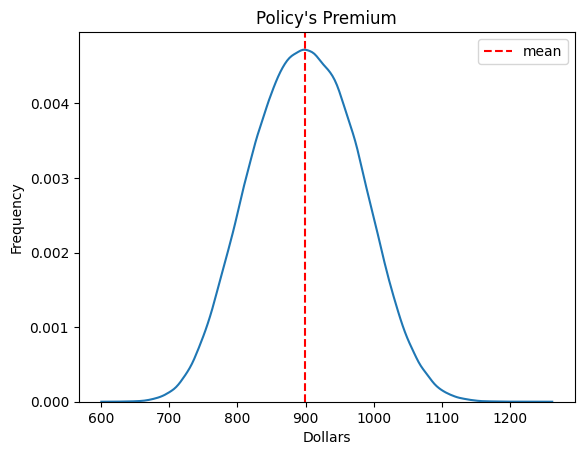

In [ ]:
# density plot
sns.kdeplot(Test['premium'])
plt.xlabel('Dollars')
plt.ylabel('Frequency')
plt.title("Policy's Premium")

# plot a vertical line for the mean
mean_val = Test['premium'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', label='mean')

plt.legend() # added a legend to define the dotted line
plt.show()

In [ ]:
# specify numerical columns for mean imputation
columns_to_impute = ['ni.age', 'len.at.res', 'premium']

# get mean for each column
mean_values = Test[columns_to_impute].mean()

# perform mode imputation for each column
Test[columns_to_impute] = Test[columns_to_impute].fillna(mean_values)

# checking work
print(Test.shape , '\n')
print(Test.isna().sum())
Test.head()

(344891, 17) 

cancel                 0
year                   0
zip.code               0
house.color            0
ni.age                 0
len.at.res             0
credit                 0
coverage.type          0
dwelling.type          0
premium                0
sales.channel          0
ni.gender              0
ni.marital.status      0
n.adults               0
n.children             0
tenure               323
claim.ind              0
dtype: int64


,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0
1,0,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0
2,0,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0
3,0,2015,98026.0,blue,45.0,15.0,high,A,Tenant,949.368847,Broker,M,1.0,1.0,3.0,12.0,0.0
4,2,2014,50022.0,white,28.0,19.0,low,C,Tenant,875.873613,Broker,F,1.0,1.0,1.0,7.0,1.0


#### Mode Imputation for the Tenure Column

##### Plot 3 - Years with **Kangaroo**

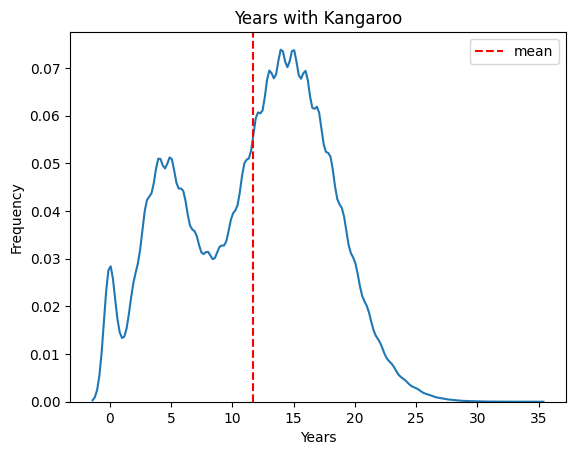

In [ ]:
# density plot
sns.kdeplot(Test['tenure'])
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title("Years with Kangaroo")

# plot a vertical line for the mean
mean_val = Test['tenure'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', label='mean')

plt.legend() # added a legend to define the dotted line
plt.show()

The density plot for tenure doesn't look like a normal distribution so mean imputation may not be the best approach.

We will review the value counts to see if the mean or mode is a better imputation methodology for this column.

In [ ]:
mode_val = Test['tenure'].mode()[0]  # getting the mode(s) of the column
counts = Test['tenure'].value_counts()  # count the occurrences of each unique value in the column

mean_val = Test['tenure'].mean()  # getting the mean of the column

print("Mean: ", mean_val ,'\n')
print("Mode: ", mode_val , '\n')
print("Value counts: \n", counts)

Mean:  11.670131875275708 

Mode:  14.0 

Value counts: 
 14.0    24929
15.0    24915
13.0    23366
16.0    23310
17.0    20673
12.0    20205
5.0     17394
4.0     17384
18.0    17303
11.0    16811
6.0     14887
3.0     14240
19.0    13457
10.0    12982
7.0     11742
0.0     11068
9.0     10767
8.0     10409
20.0     9835
2.0      8570
21.0     6624
22.0     4177
1.0      3450
23.0     2638
24.0     1549
25.0      938
26.0      482
27.0      246
28.0      121
29.0       51
30.0       28
31.0        9
32.0        4
33.0        3
34.0        1
Name: tenure, dtype: int64


It appears that the mode is a better imputation method for this column since it has higher counts.

In [ ]:
# mode imputation for tenure
mode_values = Test['tenure'].mode().iloc[0]

# perform mode imputation for each column
Test['tenure'] = Test['tenure'].fillna(mode_values)

# checking work
print(Test.shape , '\n')
print(Test.isna().sum())
Test.head()

(344891, 17) 

cancel               0
year                 0
zip.code             0
house.color          0
ni.age               0
len.at.res           0
credit               0
coverage.type        0
dwelling.type        0
premium              0
sales.channel        0
ni.gender            0
ni.marital.status    0
n.adults             0
n.children           0
tenure               0
claim.ind            0
dtype: int64


,cancel,year,zip.code,house.color,ni.age,len.at.res,credit,coverage.type,dwelling.type,premium,sales.channel,ni.gender,ni.marital.status,n.adults,n.children,tenure,claim.ind
0,0,2013,50020.0,white,33.0,16.0,high,C,House,796.385532,Broker,F,1.0,1.0,3.0,2.0,1.0
1,0,2013,80002.0,red,56.0,10.0,high,A,House,773.232687,Broker,M,1.0,2.0,0.0,14.0,0.0
2,0,2015,85005.0,white,46.0,12.0,high,C,Condo,943.047142,Broker,F,1.0,2.0,2.0,9.0,0.0
3,0,2015,98026.0,blue,45.0,15.0,high,A,Tenant,949.368847,Broker,M,1.0,1.0,3.0,12.0,0.0
4,2,2014,50022.0,white,28.0,19.0,low,C,Tenant,875.873613,Broker,F,1.0,1.0,1.0,7.0,1.0


## Creating Dummy Variables for Categorical Values

Looking at each column's data type. All columns need to be numeric before modelling.

In [ ]:
# check the info for both datasets
print(Train.info())
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690609 entries, 0 to 700231
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cancel             690609 non-null  int64  
 1   year               690609 non-null  object 
 2   zip.code           690609 non-null  float64
 3   house.color        690609 non-null  object 
 4   ni.age             690609 non-null  float64
 5   len.at.res         690609 non-null  float64
 6   credit             690609 non-null  object 
 7   coverage.type      690609 non-null  object 
 8   dwelling.type      690609 non-null  object 
 9   premium            690609 non-null  float64
 10  sales.channel      690609 non-null  object 
 11  ni.gender          690609 non-null  object 
 12  ni.marital.status  690609 non-null  object 
 13  n.adults           690609 non-null  object 
 14  n.children         690609 non-null  object 
 15  tenure             690609 non-null  float64
 16  cl

It seems that imputation has changed the imputed columns' data types in the Test partition.  We will have to change them back.

### Correcting Column Datatypes from Imputation Impact

In [ ]:
# changing dtypes for Test
Test = Test.astype({'year': object , 'ni.marital.status' : object , 'n.adults' : object , 'n.children' : object , 'claim.ind' : object ,})

# checking my work
Test.dtypes

cancel                 int64
year                  object
zip.code             float64
house.color           object
ni.age               float64
len.at.res           float64
credit                object
coverage.type         object
dwelling.type         object
premium              float64
sales.channel         object
ni.gender             object
ni.marital.status     object
n.adults              object
n.children            object
tenure               float64
claim.ind             object
dtype: object

In [ ]:
# checking both partitions have correct and same data types
print(Train.info())
print(Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690609 entries, 0 to 700231
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cancel             690609 non-null  int64  
 1   year               690609 non-null  object 
 2   zip.code           690609 non-null  float64
 3   house.color        690609 non-null  object 
 4   ni.age             690609 non-null  float64
 5   len.at.res         690609 non-null  float64
 6   credit             690609 non-null  object 
 7   coverage.type      690609 non-null  object 
 8   dwelling.type      690609 non-null  object 
 9   premium            690609 non-null  float64
 10  sales.channel      690609 non-null  object 
 11  ni.gender          690609 non-null  object 
 12  ni.marital.status  690609 non-null  object 
 13  n.adults           690609 non-null  object 
 14  n.children         690609 non-null  object 
 15  tenure             690609 non-null  float64
 16  cl

### Table 2 - Frequency Table

In [ ]:
freq_table = Train.value_counts()
print(freq_table)

cancel  year  zip.code  house.color  ni.age  len.at.res  credit  coverage.type  dwelling.type  premium      sales.channel  ni.gender  ni.marital.status  n.adults  n.children  tenure  claim.ind
0       2013  15001.0   blue         19.0    17.0        high    C              Condo          967.476149   Online         M          1.0                1.0       0.0         0.0     0.0          1
        2016  85046.0   red          59.0    12.0        low     C              House          996.699771   Broker         F          1.0                2.0       0.0         13.0    0.0          1
                                     56.0    12.0        medium  C              House          900.775071   Broker         M          0.0                3.0       0.0         14.0    1.0          1
                                             17.0        low     A              House          940.080811   Phone          F          1.0                4.0       2.0         16.0    0.0          1
               

### Table 3 - Unique Value Count for Categorical Predictors

In [ ]:
# getting number of unique values in each object column
# Train
# obj_cols_Train = Train.select_dtypes(include=['object']).drop('cancel' , axis=1)
obj_cols_Train = Train.select_dtypes(include=['object'])
unique_counts_Train = obj_cols_Train.nunique()
print(unique_counts_Train , '\n')

# Test
# obj_cols_Test = Test.select_dtypes(include=['object']).drop('cancel' , axis=1)
obj_cols_Test = Test.select_dtypes(include=['object'])
unique_counts_Test = obj_cols_Test.nunique()
print(unique_counts_Test)

year                  4
house.color           4
credit                3
coverage.type         3
dwelling.type         3
sales.channel         3
ni.gender             2
ni.marital.status     2
n.adults             12
n.children           13
claim.ind             2
dtype: int64 

year                  4
house.color           4
credit                3
coverage.type         3
dwelling.type         3
sales.channel         3
ni.gender             2
ni.marital.status     2
n.adults             12
n.children           13
claim.ind             2
dtype: int64


In [ ]:
# checking Train and Test unique values for categorical cols
print(Train['year'].unique())
print(Test['year'].unique() , '\n')

print(Train['house.color'].unique())
print(Test['house.color'].unique() , '\n')

print(Train['credit'].unique())
print(Test['credit'].unique() , '\n')

print(Train['coverage.type'].unique())
print(Test['coverage.type'].unique() , '\n')

print(Train['dwelling.type'].unique())
print(Test['dwelling.type'].unique() , '\n')

print(Train['sales.channel'].unique())
print(Test['sales.channel'].unique() , '\n')

print(Train['ni.gender'].unique())
print(Test['ni.gender'].unique() , '\n')

print(Train['ni.marital.status'].unique())
print(Test['ni.marital.status'].unique() , '\n')

print(Train['n.adults'].unique())
print(Test['n.adults'].unique() , '\n')

print(Train['n.children'].unique())
print(Test['n.children'].unique() , '\n')

print(Train['claim.ind'].unique())
print(Test['claim.ind'].unique() , '\n')



[2013 2014 2016 2015]
[2013 2015 2014 2016] 

['yellow' 'red' 'white' 'blue']
['white' 'red' 'blue' 'yellow'] 

['high' 'medium' 'low']
['high' 'low' 'medium'] 

['A' 'B' 'C']
['C' 'A' 'B'] 

['House' 'Condo' 'Tenant']
['House' 'Condo' 'Tenant'] 

['Phone' 'Broker' 'Online']
['Broker' 'Phone' 'Online'] 

['F' 'M']
['F' 'M'] 

[1.0 0.0]
[1.0 0.0] 

[1.0 2.0 3.0 5.0 4.0 7.0 6.0 9.0 8.0 10.0 12.0 11.0]
[1.0 2.0 3.0 4.0 6.0 5.0 7.0 8.0 9.0 10.0 11.0 12.0] 

[1.0 0.0 2.0 3.0 5.0 12.0 6.0 4.0 11.0 7.0 9.0 10.0 8.0]
[3.0 0.0 2.0 1.0 6.0 5.0 4.0 7.0 8.0 9.0 10.0 12.0 11.0] 

[0.0 1.0]
[1.0 0.0] 



### Creating Dummies

In [ ]:
# creating dummy variables for categorical columns
Train = pd.get_dummies(Train, columns=['year' , 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
                                  'ni.gender', 'ni.marital.status', 'n.adults' , 'n.children' , 'claim.ind'])


Test = pd.get_dummies(Test, columns=['year' , 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
                                  'ni.gender', 'ni.marital.status', 'n.adults' , 'n.children' , 'claim.ind'])


<ipython-input-38-d93e8be5b93d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Train = pd.get_dummies(Train, columns=['year' , 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
<ipython-input-38-d93e8be5b93d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Train = pd.get_dummies(Train, columns=['year' , 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
<ipython-input-38-d93e8be5b93d>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Train = pd.get_dummies(Train, columns=['year' , 'house.color', 'credit' , 'coverage.type', 'dwelling.type', 'sales.channel' ,
<ipython-input-38-d93e8be5b93d>:2: FutureWarning: In a future

In [ ]:
# checking work
print(Train.shape)
print(Test.shape)


(690609, 57)
(344891, 57)


The number of columns has changed from 17 to 57.

### Table 4 - Correlation Matrix

Possible after converting categorical variables into numerical form

In [ ]:
# calculating the correlation matrix
corr_matrix = Test.corr(method='pearson')

# creating df
df_corr = pd.DataFrame(corr_matrix)

# displaying df as table
print(df_corr)

                         cancel  zip.code    ni.age  len.at.res   premium  \
cancel                 1.000000  0.010796 -0.104058   -0.040832 -0.026352   
zip.code               0.010796  1.000000  0.002686   -0.000010 -0.000809   
ni.age                -0.104058  0.002686  1.000000   -0.002680  0.000001   
len.at.res            -0.040832 -0.000010 -0.002680    1.000000  0.003102   
premium               -0.026352 -0.000809  0.000001    0.003102  1.000000   
tenure                -0.030822  0.002856  0.588565   -0.003635 -0.001149   
year_2013             -0.032239 -0.000185 -0.001256   -0.001578 -0.001343   
year_2014              0.071465  0.000129 -0.001414   -0.000395  0.000140   
year_2015              0.005159 -0.001568  0.001563   -0.000128 -0.001141   
year_2016             -0.043043  0.001570  0.000937    0.001915  0.002188   
house.color_blue       0.000031 -0.000382 -0.000864    0.000881 -0.002796   
house.color_red        0.001928 -0.001918 -0.000661   -0.000208 -0.003156   

### Table 5 - Correlation Matrix Heatmap

In [ ]:
# using seaborn for better visibility of the data
corr = Test.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')


,cancel,zip.code,ni.age,len.at.res,premium,tenure,year_2013,year_2014,year_2015,year_2016,house.color_blue,house.color_red,house.color_white,house.color_yellow,credit_high,credit_low,credit_medium,coverage.type_A,coverage.type_B,coverage.type_C,dwelling.type_Condo,dwelling.type_House,dwelling.type_Tenant,sales.channel_Broker,sales.channel_Online,sales.channel_Phone,ni.gender_F,ni.gender_M,ni.marital.status_0.0,ni.marital.status_1.0,n.adults_1.0,n.adults_2.0,n.adults_3.0,n.adults_4.0,n.adults_5.0,n.adults_6.0,n.adults_7.0,n.adults_8.0,n.adults_9.0,n.adults_10.0,n.adults_11.0,n.adults_12.0,n.children_0.0,n.children_1.0,n.children_2.0,n.children_3.0,n.children_4.0,n.children_5.0,n.children_6.0,n.children_7.0,n.children_8.0,n.children_9.0,n.children_10.0,n.children_11.0,n.children_12.0,claim.ind_0.0,claim.ind_1.0
cancel,1.000000,0.029562,-0.106243,-0.039445,-0.027282,-0.028072,-0.033695,0.074113,0.005583,-0.044628,0.000691,0.001603,-0.002626,0.000953,-0.226366,0.223369,0.065989,-0.020376,-0.004299,0.023278,0.016452,-0.038214,0.029961,-0.189804,0.055231,0.165904,-0.000773,0.000773,0.030660,-0.030660,-0.027136,-0.003834,0.009215,0.021642,0.017868,0.012082,0.007851,0.005692,0.001873,-0.000899,0.000426,0.002895,-0.028701,-0.029473,-0.009573,0.002025,0.009507,0.021785,0.026883,0.031951,0.034344,0.034922,0.033075,0.031171,0.029092,-0.072021,0.072021
zip.code,0.029562,1.000000,0.003764,-0.000057,-0.000629,0.003435,0.000037,-0.000092,-0.001169,0.001190,-0.000269,-0.001332,-0.000411,0.003122,0.000740,-0.001752,0.000702,0.000483,-0.003136,0.002250,0.001376,0.002516,-0.004617,0.001151,0.000458,-0.001476,-0.000652,0.000652,0.002546,-0.002546,0.000342,-0.000733,-0.000247,0.002982,-0.001066,-0.003964,-0.000196,0.001891,-0.001162,0.000548,-0.000003,-0.001218,-0.000700,0.000555,0.001726,-0.000997,-0.000062,-0.000863,0.001098,0.000432,-0.000831,-0.003039,-0.000119,0.003296,-0.001278,0.000759,-0.000759
ni.age,-0.106243,0.003764,1.000000,-0.001720,0.000989,0.637763,-0.001769,-0.001323,0.001470,0.001404,-0.000715,-0.000732,0.002007,-0.001177,0.100803,-0.056613,-0.067858,-0.000132,0.001017,-0.000753,-0.147791,0.262620,-0.168553,0.063529,-0.149197,0.021950,-0.001033,0.001033,-0.069890,0.069890,-0.000438,0.000552,-0.000038,-0.001982,0.002396,0.001734,-0.001277,-0.001229,0.000683,0.002533,0.000435,0.001642,-0.070200,-0.006667,0.012422,0.027188,0.025697,0.026115,0.024329,0.023970,0.022946,0.019749,0.018810,0.016354,0.015436,-0.001833,0.001833
len.at.res,-0.039445,-0.000057,-0.001720,1.000000,0.002767,-0.002245,-0.000217,0.000141,-0.000241,0.000298,0.001538,0.000013,-0.001352,-0.000138,-0.001539,0.002954,-0.000840,0.001054,-0.000109,-0.000917,0.003337,-0.001404,-0.001838,0.000330,0.000463,-0.000620,0.002539,-0.002539,0.003227,-0.003227,0.001959,-0.003689,-0.000183,0.000772,0.001682,0.001761,0.000683,-0.000975,0.000544,0.000838,0.000685,-0.002393,0.001364,-0.002090,-0.000039,0.001475,0.001630,0.002643,-0.002020,-0.001610,-0.001894,-0.001713,0.000825,-0.001096,-0.002559,0.001333,-0.001333
premium,-0.027282,-0.000629,0.000989,0.002767,1.000000,-0.001122,-0.001683,-0.000299,-0.000799,0.002573,-0.003068,-0.002304,0.004583,0.000510,-0.001379,0.000081,0.001551,-0.001196,-0.000795,0.001835,-0.003166,0.003397,-0.000832,-0.004624,0.002950,0.003091,-0.000347,0.000347,0.000182,-0.000182,0.000062,0.002159,-0.000583,-0.001453,0.000595,-0.002222,-0.002018,-0.002829,-0.000986,0.001475,-0.001536,-0.002583,0.000694,-0.000099,-0.001948,0.001444,-0.003426,0.001269,0.002452,-0.000869,0.000883,0.001599,-0.000681,-0.000350,0.000897,-0.000182,0.000182
tenure,-0.028072,0.003435,0.637763,-0.002245,-0.001122,1.000000,-0.000707,-0.000886,0.001763,-0.000247,-0.002990,0.001251,0.002017,-0.000616,0.082395,-0.048747,-0.053246,0.000756,-0.000338,-0.000433,-0.064104,0.111332,-0.069893,0.054044,-0.132013,0.021692,-0.001749,0.001749,-0.040116,0.040116,0.000703,-0.000691,0.002732,-0.002907,0.000092,-0.001592,-0.001470,-0.001256,0.001377,0.001277,-0.000655,-0.000533,-0.042383,-0.003233,0.00505

## Separate into X_train, X_test, y_train, and y_test



In [ ]:
# now separate them
X_train = Train.drop(['cancel'], axis = 1)
X_test = Test.drop(['cancel'], axis = 1)
y_train = Train['cancel']
y_test = Test['cancel']

In [ ]:
# checking my work

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(690609, 56) (344891, 56) (690609,) (344891,)


## Scaling

### Comment on Scaling <br>
Given that the dataset is mostly comprised of categorical data, scaling has minimal impact on results.  Even so, we tested several scalers to be sure that was the case and settled on the Standard Scaler.

### Standard Scaler

In [ ]:
# learn the range on X_train, and apply scaling to X_test
# applying scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # learn and apply to train (from train)
X_test = scaler.transform(X_test) # simply TRANSFORM/APPLY to the test data (no leakage!)

## Sampling Technique

### Checking the Counts of Unique Values

In [ ]:
# y_train unique counts
Counter(y_train)

Counter({0: 489698, 2: 151118, 1: 49793})

##### Plot 4 - y_train Value Counts Before SMOTE

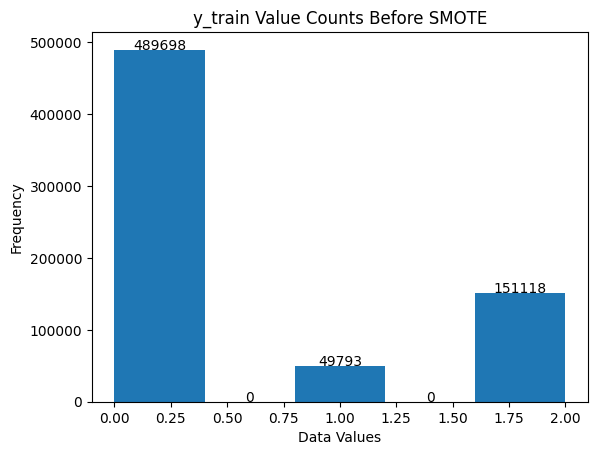

In [ ]:
# create the histogram
n, bins, patches = plt.hist(y_train, bins=5)

# add count values as text labels
for i in range(len(patches)):
    plt.text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')

# set plot title and axis labels
plt.title('y_train Value Counts Before SMOTE')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# show the plot
plt.show()

Checking the counts of the unique categorical values in y_test

In [ ]:
# y_test unique counts
Counter(y_test)

Counter({0: 244522, 2: 75597, 1: 24772})

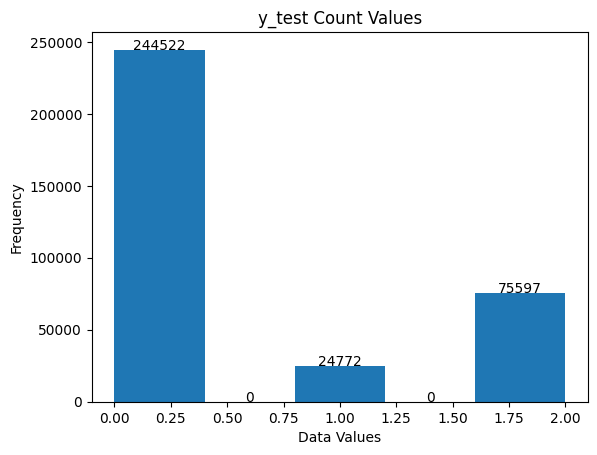

In [ ]:
# create the histogram
n, bins, patches = plt.hist(y_test, bins=5)

# add count values as text labels
for i in range(len(patches)):
    plt.text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')

# set plot title and axis labels
plt.title('y_test Count Values')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# show the plot
plt.show()

The dataset is imbalanced with the class containing 1s and 2s being substantially less that the class with 0s

In [ ]:
# y_train needs to be an obj data type
# model would not work until change dependent col to str
y_train = y_train.astype(str)

# checking
print(y_train.dtype)

object


### SMOTE

In [ ]:
# define SMOTE
sm = SMOTE(random_state=42)

# fit and apply to training partition
X_train , y_train = sm.fit_resample(X_train, y_train)

# after oversampling

print(Counter(y_train))

Counter({'0': 489698, '2': 489698, '1': 489698})


#### Comment on SMOTE <br>
Even though SMOTE reduced the overall accuracy of the logistic regression, decision tree, and random forest models, it is preferable.  This is because SMOTE increased the model's effectiveness at predicting the under represented values in the response variable at a cost to reduced effectiveness at predicting the majority value.  This is acceptable because additional data will increase the model's effectiveness at predicting all 3 values instead of just the majority value.  

#####  Plot 5 - y_train Value Counts After SMOTE

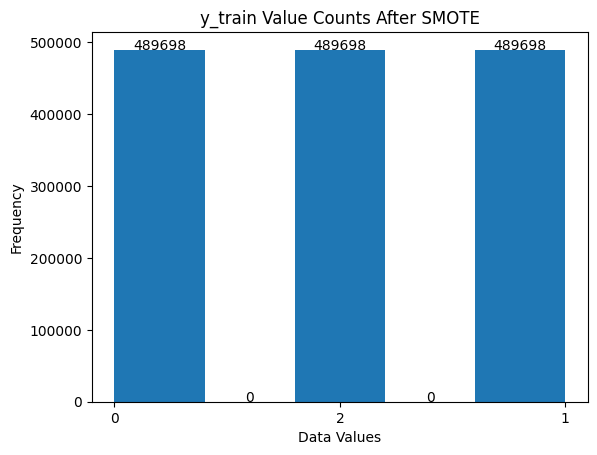

In [ ]:
# create the histogram
n, bins, patches = plt.hist(y_train, bins=5)

# add count values as text labels
for i in range(len(patches)):
    plt.text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')

# set plot title and axis labels
plt.title('y_train Value Counts After SMOTE')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

# show the plot
plt.show()

# Modelling


#### Comment on Modelling

Logistic Regression & Decision Tree - We spent a large amount of time tuning a multinomial logistic regression and a decision tree model and the accuracy was little better than 50%.

**Important note**
<br>
Learned that with a multinomial dependent variable you need the column to be a category data type.

In [ ]:
# y_test needs to be an obj data type
# model would not work until change dependent col to str
y_test = y_test.astype(str)

# checking
print(y_test.dtype)

object


### Random Forest Classifier

#### Determining the Hyperparameter Values & Fitting the Model

#### Comment on Determining Hyperparameters <br>

We commented out the code below because it takes close to 4 hours to run with Colab Pro and mulitple cores.  We took the hyperparameter results from the code and applied them directly to the model at cell 144 to increase speed of running the entire project.

In [ ]:
# # defining hyperparameters
# param_dist = {
#     'n_estimators': randint(50, 200),
#     'max_depth': [None, 5, 10],
#     'min_samples_split': randint(2, 15),
#     'min_samples_leaf': randint(1, 9),
#     'max_features': randint(1, 9),
#     'criterion': ["gini", "entropy"],
# }

# # creating a Random Forest
# rfc = RandomForestClassifier()

# # creating a random seach since grid search taking too long
# random_search = RandomizedSearchCV(
#     estimator=rfc,
#     param_distributions=param_dist,
#     n_jobs=2,
#     n_iter=10,
#     cv=5,
#     random_state=42,
# )

# # fitting the model
# random_search.fit(X_train, y_train)

# # printing the best parameters
# best_params = random_search.best_params_
# print(best_params)

# # fitting with best parameters
# rfc_best = RandomForestClassifier(**best_params)
# rfc = rfc_best.fit(X_train, y_train)

In [ ]:
# # Commented out due to note above

# # Storing the predictions
# train_preds_rfc = rfc.predict(X_train)
# test_preds_rfc = rfc.predict(X_test)

In [ ]:
# random forest model
rfc = RandomForestClassifier(criterion='gini', min_samples_split=5, n_estimators=138, min_samples_leaf= 2 ,
       max_features= 7, max_depth=None)

#Fitting the model
rfc = rfc.fit(X_train,y_train)

#Storing the predictions
train_preds_rfc = rfc.predict(X_train)
test_preds_rfc = rfc.predict(X_test)

#### Classification Reports

##### Train

In [ ]:
# train classification report
trainResults_rfc = classification_report(y_train, train_preds_rfc) # (actual, predicted)
print(trainResults_rfc)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    489698
           1       0.99      1.00      0.99    489698
           2       0.99      0.94      0.96    489698

    accuracy                           0.97   1469094
   macro avg       0.97      0.97      0.97   1469094
weighted avg       0.97      0.97      0.97   1469094



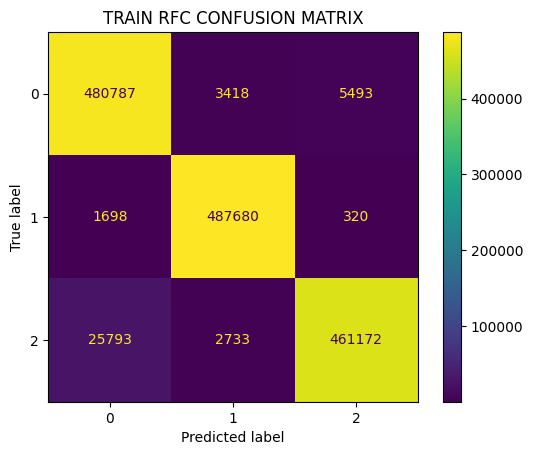

In [ ]:
# visual cm
cm_matrix = metrics.confusion_matrix(y_train, train_preds_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_matrix)


cm_display.plot()
cm_display.ax_.set_title("TRAIN RFC CONFUSION MATRIX")
plt.show()

##### Test

In [ ]:
# test classification report
testResults_rfc = classification_report(y_test, test_preds_rfc) # (actual, predicted)
print(testResults_rfc)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82    244522
           1       0.39      0.53      0.45     24772
           2       0.49      0.36      0.42     75597

    accuracy                           0.71    344891
   macro avg       0.56      0.58      0.56    344891
weighted avg       0.70      0.71      0.70    344891



###### Weighted F1 Score

In [ ]:
# weighted F1 score
weighted_f1_score = f1_score(y_test, test_preds_rfc, average='weighted')
print('The weighted F1 score is ', round(weighted_f1_score, 5))

The weighted F1 score is  0.70484


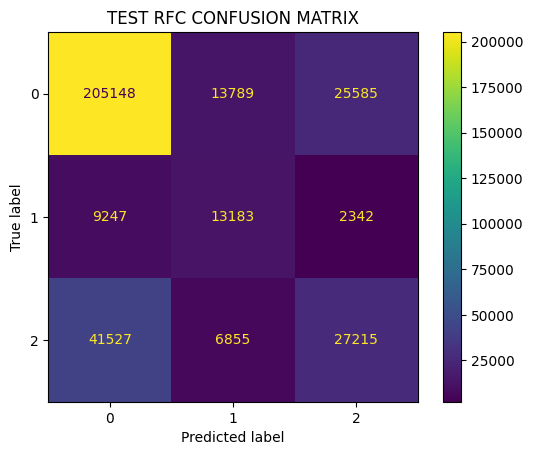

In [ ]:
# visual cm
cm_matrix = metrics.confusion_matrix(y_test, test_preds_rfc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_matrix)


cm_display.plot()
cm_display.ax_.set_title("TEST RFC CONFUSION MATRIX")
plt.show()

#### Comment on Model Effectiveness

Given the substantial imbalance of the response variable, the model predicts well when a policy will not be cancelled since the dataset was substantially comprised of those occurences.  Policies that will be cancelled and those retained with effort are predicted far less well because there is substantially less data for those occurences and thereby less data to train model though SMOTE did improve the model in this area.



# Interpretability and Discussion <br>


### Permutation Importance

In [ ]:
# permutation importance with 5 repeats
clf = rfc

result = permutation_importance(clf, X_test, y_test, n_repeats=5,
                                random_state=10)
perm_sorted_idx = result.importances_mean.argsort()

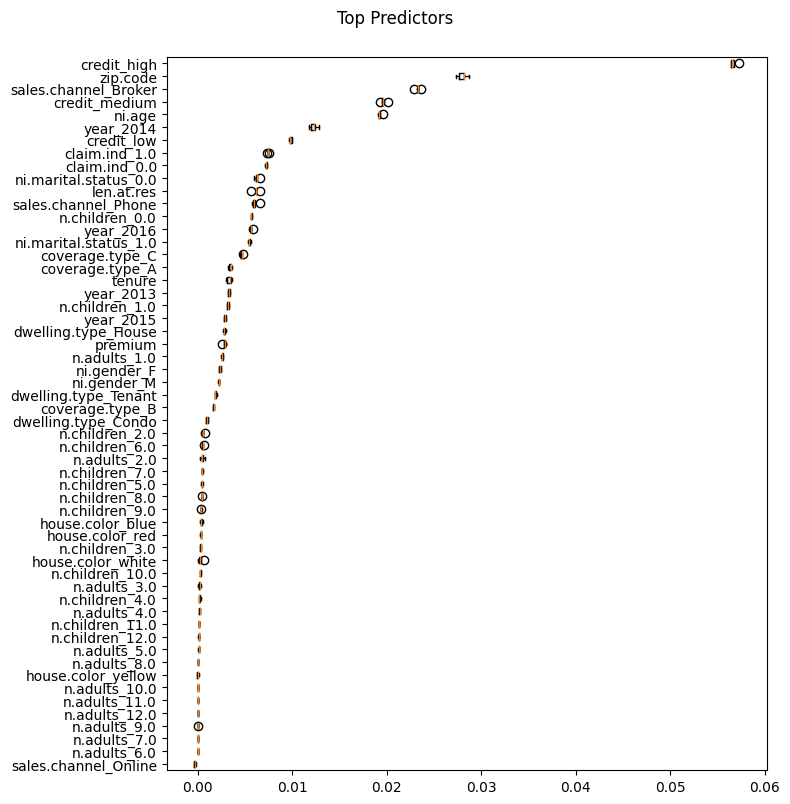

In [ ]:
# creating a df for cols
X=Test.drop(['cancel'], axis = 1)

fig, ax1 = plt.subplots(1, 1, figsize=(8, 8))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
fig.suptitle('Top Predictors', y=1)
fig.tight_layout()
plt.show()

## Top 5 Predictors

1.  Policyholders with high credit scores
2.  Policyholder's zip code
3.  Policies purchased through a broker
4.  Policyholders with medium credit scores
5.  Age of the policyholder

Preparing datasets for use with visualizations

In [ ]:
# checking to make sure I can concat these to use to show total counts for a predictor
print(Train.shape)
print(Test.shape, '\n')

print(type(Train))
print(type(Test))


(690609, 57)
(344891, 57) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# concat Train and Test along rows
counts = pd.concat([Train, Test])

# checking
print(counts.shape, '/n')
counts.head()

(1035500, 57) /n


,cancel,zip.code,ni.age,len.at.res,premium,tenure,year_2013,year_2014,year_2015,year_2016,...,n.children_5.0,n.children_6.0,n.children_7.0,n.children_8.0,n.children_9.0,n.children_10.0,n.children_11.0,n.children_12.0,claim.ind_0.0,claim.ind_1.0
0,0,15056.0,55.0,15.0,935.554116,14.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,80014.0,60.0,17.0,835.804218,17.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,85002.0,48.0,15.0,958.488416,11.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,85051.0,57.0,15.0,963.496010,19.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,85077.0,42.0,16.0,803.088375,12.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


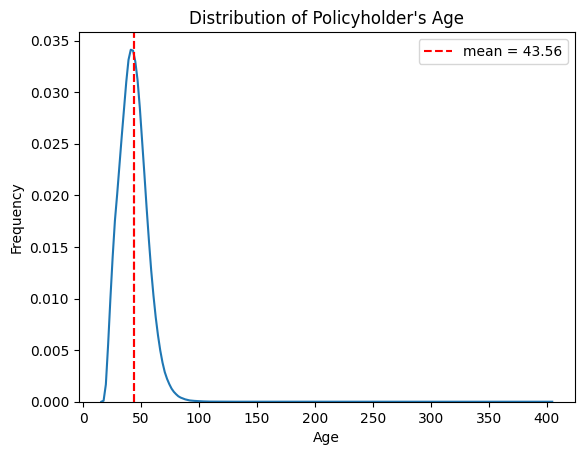

In [ ]:
# density plot
sns.kdeplot(counts['ni.age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Policyholder's Age")

# plot a vertical line for the mean
mean_val = counts['ni.age'].mean()
plt.axvline(mean_val, color='red', linestyle='dashed')

# adding mean value
plt.axvline(mean_val, color='red', linestyle='dashed', label=f'mean = {mean_val:.2f}')

plt.legend() # added a legend to define the dotted line
plt.show()

## Partial Dependence Plots for Top 5 Predictors

In [ ]:
# getting library for ice plots
!pip install pulp
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# creating a df for use with ice plots
x_train_df = pd.DataFrame(X_train, columns = X.columns)

# checking work
print(X_train_df.shape, '\n')
x_train_df.head()

(700232, 17) 



,zip.code,ni.age,len.at.res,premium,tenure,year_2013,year_2014,year_2015,year_2016,house.color_blue,...,n.children_5.0,n.children_6.0,n.children_7.0,n.children_8.0,n.children_9.0,n.children_10.0,n.children_11.0,n.children_12.0,claim.ind_0.0,claim.ind_1.0
0,-1.691355,0.925469,-0.047405,0.458343,0.391009,1.929186,-0.555590,-0.596878,-0.638579,-0.623407,...,-0.198157,-0.155954,-0.132978,-0.113163,-0.097498,-0.08557,-0.07455,-0.065039,0.498797,-0.498797
1,0.629873,1.330043,0.390682,-0.826598,0.896614,-0.518353,1.799888,-0.596878,-0.638579,-0.623407,...,-0.198157,-0.155954,-0.132978,-0.113163,-0.097498,-0.08557,-0.07455,-0.065039,0.498797,-0.498797
2,0.808116,0.359065,-0.047405,0.753774,-0.114596,-0.518353,1.799888,-0.596878,-0.638579,-0.623407,...,-0.198157,-0.155954,-0.132978,-0.113163,-0.097498,-0.08557,-0.07455,-0.065039,-2.004826,2.004826
3,0.809867,1.087299,-0.047405,0.818280,1.233684,-0.518353,1.799888,-0.596878,-0.638579,-0.623407,...,-0.198157,-0.155954,-0.132978,-0.113163,-0.097498,-0.08557,-0.07455,-0.065039,0.498797,-0.498797
4,0.810796,-0.126425,0.171638,-1.248032,0.053939,1.929186,-0.555590,-0.596878,-0.638579,-0.623407,...,-0.198157,-0.155954,-0.132978,-0.113163,-0.097498,-0.08557,-0.07455,-0.065039,0.498797,-0.498797


### PDP - Policyholders with High Credit Scores

In [ ]:
temp_df = ice(data=x_train_df, column='credit_high', predict=rfc.predict, num_grid_points=4)
print(np.shape(temp_df))

(2, 1469094)


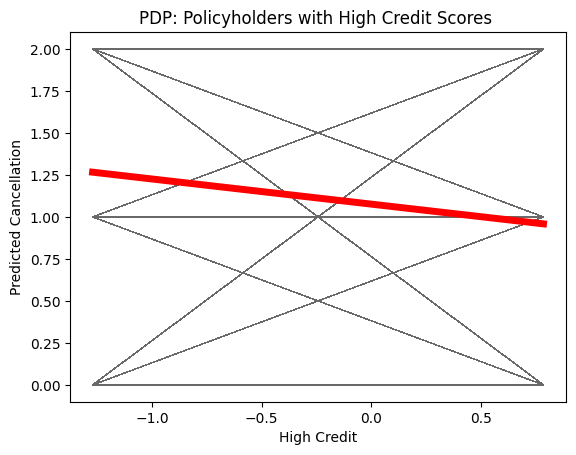

In [ ]:
# creating pdp
ice_plot(temp_df, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth':5, 'color':'red'})
plt.title('PDP: Policyholders with High Credit Scores ')
plt.ylabel('Predicted Cancellation')
plt.xlabel('High Credit');
plt.show()

#### Policyholders with High Credit Scores and Retaining Policy

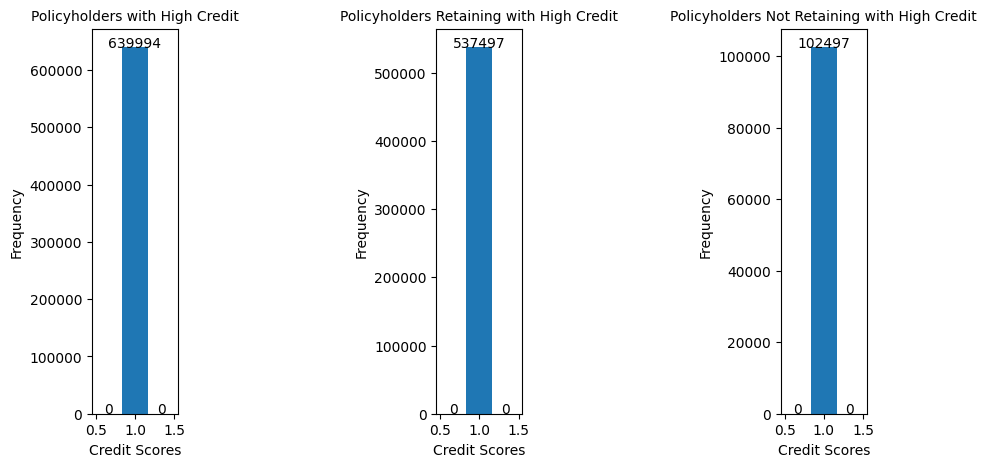

In [ ]:
# subplot of relationship with high credit and retaining policy
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# plot 1
credit_high_1 = counts[counts['credit_high'] == 1]['credit_high']
n, bins, patches = axs[0].hist(credit_high_1, bins=3)
for i in range(len(patches)):
    axs[0].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[0].set_title('Policyholders with High Credit', fontsize=10)
axs[0].set_xlabel('Credit Scores')
axs[0].set_ylabel('Frequency')

# plot 2
credit_high_1_cancel_0_1 = counts[(counts['credit_high'] == 1) & (counts['cancel'].isin([0, 1]))]['credit_high']
n, bins, patches = axs[1].hist(credit_high_1_cancel_0_1, bins=3)
for i in range(len(patches)):
    axs[1].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[1].set_title('Policyholders Retaining with High Credit', fontsize=10)
axs[1].set_xlabel('Credit Scores')
axs[1].set_ylabel('Frequency')

# plot 3
credit_high_1_cancel_2 = counts[(counts['credit_high'] == 1) & (counts['cancel'] == 2)]['credit_high']
n, bins, patches = axs[2].hist(credit_high_1_cancel_2, bins=3)
for i in range(len(patches)):
    axs[2].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[2].set_title('Policyholders Not Retaining with High Credit', fontsize=10)
axs[2].set_xlabel('Credit Scores')
axs[2].set_ylabel('Frequency')

plt.subplots_adjust(wspace=3)  # increasing space between plots

plt.show()

### PDP - Zip Codes

In [ ]:
temp_df_zip = ice(data=x_train_df, column='zip.code', predict=rfc.predict, num_grid_points=4)
print(np.shape(temp_df_zip))

(4, 1469094)


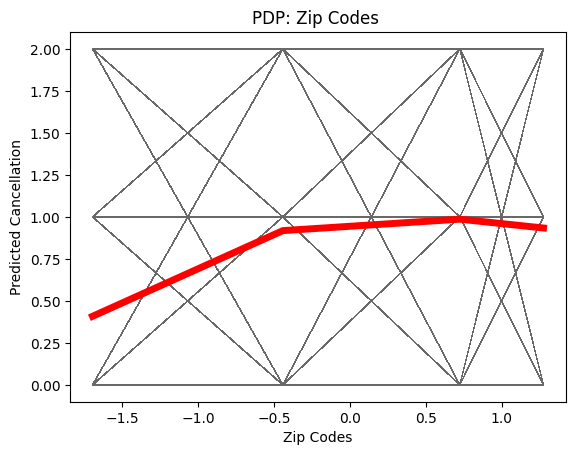

In [ ]:
# creating pdp
ice_plot(temp_df_zip, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth':5, 'color':'red'})
plt.title('PDP: Zip Codes ')
plt.ylabel('Predicted Cancellation')
plt.xlabel('Zip Codes');
plt.show()

#### Zip Code Distribution

We treated the zip code predictor as a continuous predictor even though it is actually a categorical predictor.  We did this because there are 310 unique zip codes and creating dummy variables for every zip code would have increased the dimension of our dataset to the point where the model would take hours to run.  Additionally, the permutation test with our current 57 predictors took nearly 3 hours so more than 350 predictors could easily take more than a day.<br>

Since zip codes are actually a categorical predictor, the PDP is not particularly illuminating.  We will provide suggestions for further study in this area in the interpretability comments.

In [ ]:
# getting the mode(s) of the column to see if it is overwhelmingly represented
mode_val = counts['zip.code'].mode()[0]

# counting the occurrences of each unique value
counts_zip = counts['zip.code'].value_counts()

print("Mode: ", mode_val , '\n')
print("Value counts: \n", counts_zip)

Mode:  50047.0 

Value counts: 
 50047.0    18790
50054.0    14816
50025.0    13997
50021.0    13826
80022.0    13470
           ...  
20137.0      586
20146.0      580
20115.0      561
20142.0      559
20108.0      520
Name: zip.code, Length: 310, dtype: int64


### PDP - Policies Purchased Using a Broker

In [ ]:
temp_df_broker = ice(data=x_train_df, column='sales.channel_Broker', predict=rfc.predict, num_grid_points=4)
print(np.shape(temp_df_broker))

(2, 1469094)


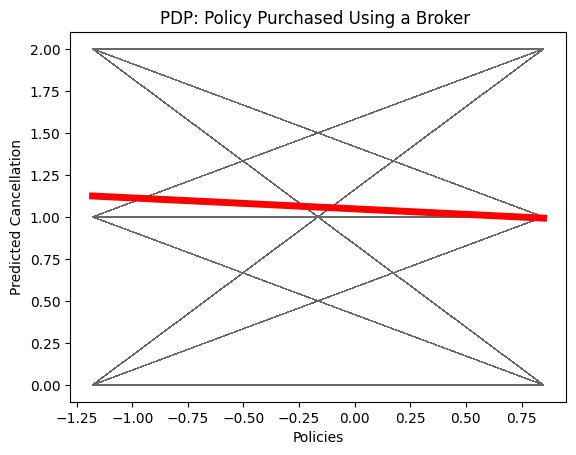

In [ ]:
# creating pdp
ice_plot(temp_df_broker, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth':5, 'color':'red'})
plt.title('PDP: Policy Purchased Using a Broker ')
plt.ylabel('Predicted Cancellation')
plt.xlabel('Policies');
plt.show()

#### Policies Purchased Using a Broker and Retaining Policy

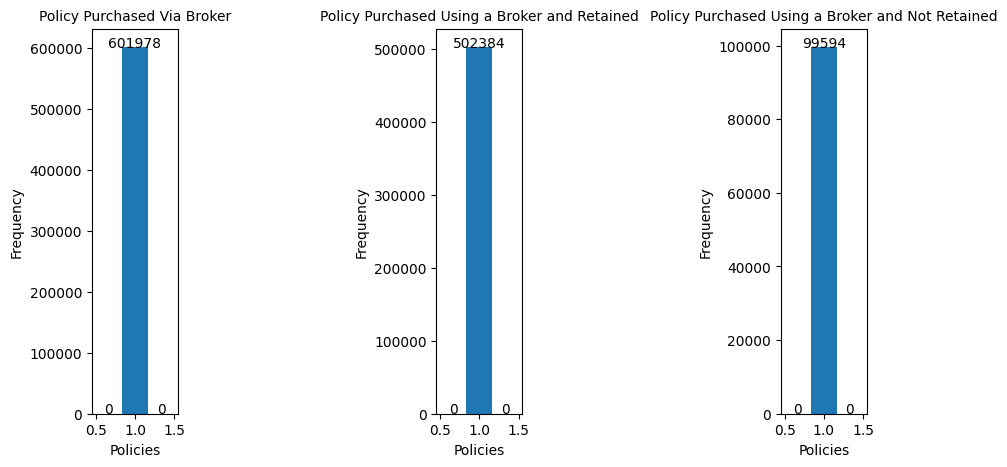

In [ ]:
# subplot of relationship with using broker and retaining policy
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# plot 1
sales_Broker_1 = counts[counts['sales.channel_Broker'] == 1]['sales.channel_Broker']
n, bins, patches = axs[0].hist(sales_Broker_1, bins=3)
for i in range(len(patches)):
    axs[0].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[0].set_title('Policy Purchased Via Broker', fontsize=10)
axs[0].set_xlabel('Policies')
axs[0].set_ylabel('Frequency')

# plot 2
sales_Broker_1_cancel_0_1 = counts[(counts['sales.channel_Broker'] == 1) & (counts['cancel'].isin([0, 1]))]['sales.channel_Broker']
n, bins, patches = axs[1].hist(sales_Broker_1_cancel_0_1, bins=3)
for i in range(len(patches)):
    axs[1].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[1].set_title('Policy Purchased Using a Broker and Retained', fontsize=10)
axs[1].set_xlabel('Policies')
axs[1].set_ylabel('Frequency')


# plot 3
sales_Broker_1_cancel_2 = counts[(counts['sales.channel_Broker'] == 1) & (counts['cancel'] == 2)]['sales.channel_Broker']
n, bins, patches = axs[2].hist(sales_Broker_1_cancel_2, bins=3)
for i in range(len(patches)):
    axs[2].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[2].set_title('Policy Purchased Using a Broker and Not Retained', fontsize=10)
axs[2].set_xlabel('Policies')
axs[2].set_ylabel('Frequency')

plt.subplots_adjust(wspace=3)  # increasing space between plots

plt.show()

### PDP - Policyholders with Medium Credit Scores

In [ ]:
temp_df_med = ice(data=x_train_df, column='credit_medium', predict=rfc.predict, num_grid_points=4)
print(np.shape(temp_df_med))

(2, 1469094)


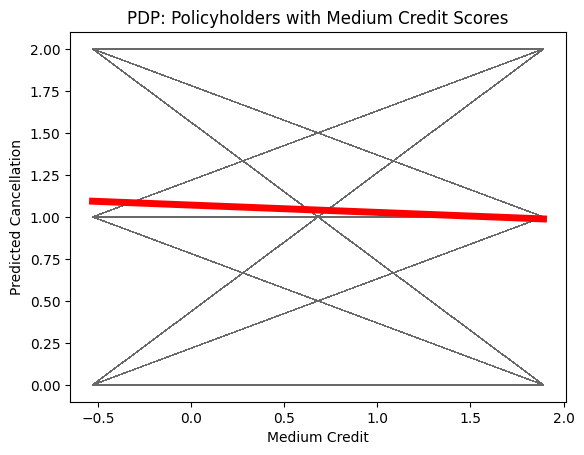

In [ ]:
# creating pdp
ice_plot(temp_df_med, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth':5, 'color':'red'})
plt.title('PDP: Policyholders with Medium Credit Scores')
plt.ylabel('Predicted Cancellation')
plt.xlabel('Medium Credit');
plt.show()

#### Policyholders with Medium Credit Scores and Retaining Policy

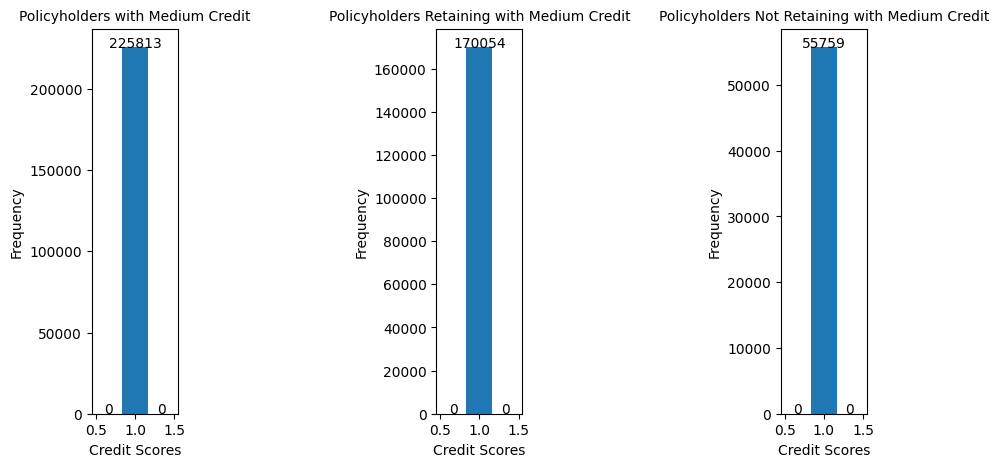

In [ ]:
# subplot of relationship with medium credit and retaining policy
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

# plot 1
credit_medium_1 = counts[counts['credit_medium'] == 1]['credit_medium']
n, bins, patches = axs[0].hist(credit_medium_1, bins=3)
for i in range(len(patches)):
    axs[0].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[0].set_title('Policyholders with Medium Credit', fontsize=10)
axs[0].set_xlabel('Credit Scores')
axs[0].set_ylabel('Frequency')

# plot 2
credit_medium_1_cancel_0_1 = counts[(counts['credit_medium'] == 1) & (counts['cancel'].isin([0, 1]))]['credit_medium']
n, bins, patches = axs[1].hist(credit_medium_1_cancel_0_1, bins=3)
for i in range(len(patches)):
    axs[1].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[1].set_title('Policyholders Retaining with Medium Credit', fontsize=10)
axs[1].set_xlabel('Credit Scores')
axs[1].set_ylabel('Frequency')


# plot 3
credit_medium_1_cancel_2 = counts[(counts['credit_medium'] == 1) & (counts['cancel'] == 2)]['credit_medium']
n, bins, patches = axs[2].hist(credit_medium_1_cancel_2, bins=3)
for i in range(len(patches)):
    axs[2].text(patches[i].get_x()+patches[i].get_width()/2, n[i]+5, int(n[i]), ha='center')
axs[2].set_title('Policyholders Not Retaining with Medium Credit', fontsize=10)
axs[2].set_xlabel('Credit Scores')
axs[2].set_ylabel('Frequency')

plt.subplots_adjust(wspace=3)  # increasing space between plots

plt.show()

### PDP - Policyholder's Age

In [ ]:
temp_df_age = ice(data=x_train_df, column='ni.age', predict=rfc.predict, num_grid_points=4)
print(np.shape(temp_df_age))

(4, 1469094)


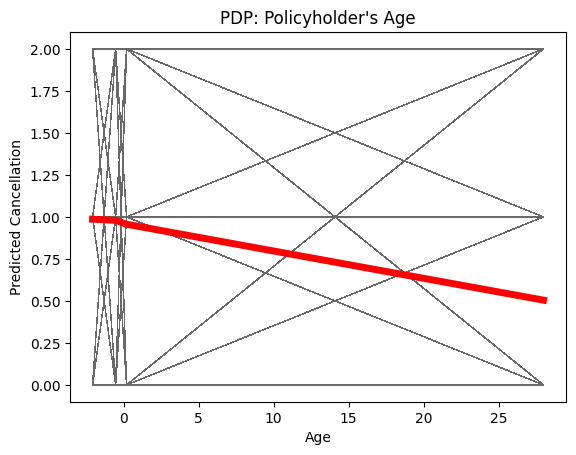

In [ ]:
# creating pdp
ice_plot(temp_df_age, c='dimgray', linewidth=0.3, plot_pdp=True, pdp_kwargs={'linewidth':5, 'color':'red'})
plt.title("PDP: Policyholder's Age")
plt.ylabel('Predicted Cancellation')
plt.xlabel('Age');
plt.show()

#### Distribution of Policyholder's Age for Retention and Cancellation

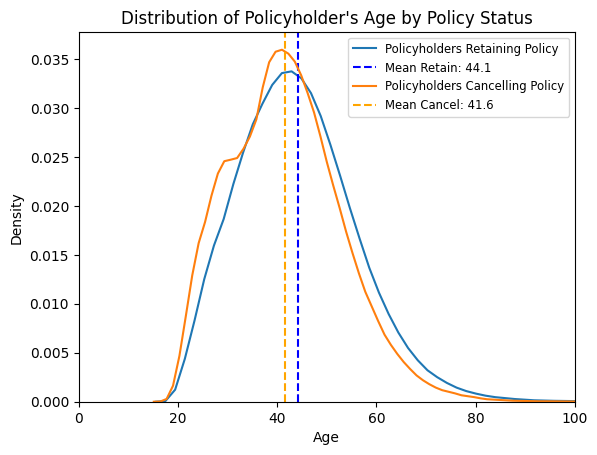

In [ ]:
# calculating mean for each curve
mean_retain = counts.loc[counts['cancel'].isin([0, 1]), 'ni.age'].mean()
mean_cancel = counts.loc[counts['cancel'] == 2, 'ni.age'].mean()

# plot the two curves and add mean
sns.kdeplot(counts.loc[counts['cancel'].isin([0, 1]), 'ni.age'], label='Policyholders Retaining Policy')
plt.axvline(mean_retain, color='blue', linestyle='dashed', label=f"Mean Retain: {mean_retain:.1f}")
sns.kdeplot(counts.loc[counts['cancel'] == 2, 'ni.age'], label='Policyholders Cancelling Policy')
plt.axvline(mean_cancel, color='orange', linestyle='dashed', label=f"Mean Cancel: {mean_cancel:.1f}")

# set axis labels, title, and legend
plt.xlabel('Age')
plt.ylabel('Density')
plt.title("Distribution of Policyholder's Age by Policy Status")
plt.legend(loc='best', fontsize='small')

# set x-axis limit to 0-100
plt.xlim(0, 100)

# show the plot
plt.show()


## Interpretability Commentary <br>

1. **Credit scores have a substantial impact on whether a policyholder will renew or cancel their policy.** Policyholders with a high credit score overwhelmingly renew their policy as can be seen by the chart.  Additionally, a high credit score represents the single most impact on renewal.  Policyholders with a medium credit score are also very like to renew their policy.  A medium credit score is the fourth most impactful predictor.

2. **The insured property's zip code is the second most impactful predictor on renewal.**  Further study is warranted to determine why a property's zip code is so impactful.  We speculate that properties in affluent areas are more likely to have policyholders that renew.  However, the current model cannot be used to test that theory or to determine what about zip codes are impactful.  Therefore, we suggest another study specifically looking at the zip codes and overlaying demographic data to see what about a zip code is so impactful to renewal.

3. **Policies purchased through a broker are more likely to be renewed and broker purchases represent the 3rd most impactful predictor of renewal.** Similar to zip codes further study is warranted to determine why policies purchased through a broker are more likely to be renewed.  However, we speculate that the personal relationship engendered by a broker may positively impact renewal.  It is also possible that more wealthy customers utilize a broker and they may be more likely to renew due to their wealth.

4. **A policyholder's age is the 5th most impactful predictor of renewal with older policyholders more likely to renew all things being equal.**  Again, further study is warranted, but we surmise that older policyholders are generally more financially stable and are in a better position to renew.

# Business Recommendations <br>

1. Target the medium and high credit score demographic for new sales.  Given the stickiness of medium and high credit policyholders, you may want to run a promotion offering initial term discounts to attract these folks.

2. Target current policyholders with low credit scores for a marketing campaign to drive retention.  Policyholders with medium and high credit scores are very sticky and thus less in need of this type of marketing.

3. Consider launching a proactive broker outreach program for current policyholders predicited to cancel.  The broker relationship has show to impact retention.

4. Target young current policyholders with a marketing campaign to drive retention.  Young policyholders are less likely to renew and should be targetted.

5. Green light further data science studies to understand the relationship between a zip code and retention as well as a policyholder's age and retention.  These represent the 2nd and 5th most impactful predictor and therefore should be understood.

# Conclusions

* **Model selection is critical to performance.**  We spent a large amount of time tuning a multinomial logistic regression model and the accuracy was little better than 50%.  That isn't terrible given the 3 possible predictions.  However a random forest classification model performed substantially better.
<br><br>

* Model selection is critical, but **model tuning with hyperparameters is almost as important.** Accuracy was impacted several percentage points based on the selection and settings of the hyperparameters.  
<br>

* There are numerous hyperparameters with numerous values and trying to determine the optimal mix by trial and error was impossible. Therefore, using a **random search with cross-validation was the most effective bit of code we learned during this project.**  Its important to note that we tried using a grid search to retrieve the absolute optimal mix, but the required compute resources crashed Colab.  Therefore, using a random search which provides an approximate optimal mix was a life saver.
<br><br>

* **Modelling quickly becomes compute intensive.**  Once we applied SMOTE to account for the imbalance in the response variable our dataset ballooned causing Colab to crash when running the model.  We had to upgrade to Colab Pro to sample and run our model.
<br><br>

* **Real world modelling is not the same as modelling in the classroom.**  However, our class work provided the framework, skills, and root-level understanding necessary to solve the problems that came up while working on this project.  For example, running our model required us to not only upgrade Colab to Colab Pro Plus, but to learn how to efficiently run our model by using code to take advantage of parallel processing with multiple CPU cores (n_jobs=).
